In [2]:
#Importing Libraries

In [4]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [45]:
#Extract Filenames from Folder

In [6]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [8]:
len(filenames)

420

In [13]:
#Importing ResNet50 Model and Cofiguration

In [ ]:
#Extracting Fetaures from Image

In [15]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


array([0.        , 0.00295298, 0.        , ..., 0.00752507, 0.02113523,
       0.0040174 ], dtype=float32)

In [17]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [44]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


array([0.        , 0.01761619, 0.00171607, ..., 0.0124724 , 0.02726402,
       0.06899223], dtype=float32)

In [19]:
image_features = []
for file in filenames[0:420]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.00491865, 0.0581298 , 0.00543876, ..., 0.00351522, 0.05245367,
        0.03639519], dtype=float32),
 array([5.5066889e-06, 1.0178068e-01, 2.0306822e-02, ..., 2.6299686e-03,
        2.3691962e-02, 4.2438049e-02], dtype=float32),
 array([0.00368397, 0.06017024, 0.00153247, ..., 0.00427823, 0.02528008,
        0.04479657], dtype=float32),
 array([0.01836052, 0.03489714, 0.00521659, ..., 0.02513073, 0.01778027,
        0.01320625], dtype=float32),
 array([0.        , 0.02540988, 0.        , ..., 0.02201726, 0.05976259,
        0.01438739], dtype=float32),
 array([0.        , 0.03195979, 0.        , ..., 0.00272934, 0.04561885,
        0.01183026], dtype=float32),
 array([0.01742964, 0.052351  , 0.00249536, ..., 0.00967022, 0.03570656,
        0.03699996], dtype=float32),
 array([0.01444822, 0.03732635, 0.00103418, ..., 0.02272432, 0.02916494,
        0.0226421 ], dtype=float32),
 array([0.        , 0.03699745, 0.01303427, ..., 0.00977647, 0.01712198,
        0.02275787], dtype=fl

In [21]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [23]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [25]:
#Loading Pickle Files

In [27]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [29]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [31]:
np.array(Image_features).shape

(420, 2048)

In [33]:
#Finidng Simialar Images

In [35]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [37]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [39]:
input_image = extract_features_from_images('1163.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


In [41]:
distance,indices = neighbors.kneighbors([input_image])

In [43]:
indices[0]

array([  0,   1, 100, 230, 228, 111], dtype=int64)

In [45]:
from IPython.display import Image

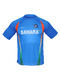

In [59]:
Image('1163.jpg')

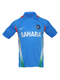

In [61]:
Image(filenames[indices[0][1]])

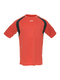

In [63]:
Image(filenames[indices[0][2]])

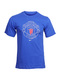

In [65]:
Image(filenames[indices[0][3]])

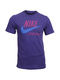

In [67]:
Image(filenames[indices[0][4]])

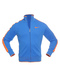

In [69]:
Image(filenames[indices[0][5]])